Инокова Эвита 3824М1ФИ3


---


Выяснить, какие факторы имели наибольшее влияние на выживание в катастрофе.

https://www.kaggle.com/datasets/sakshisatre/titanic-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("Titanic Dataset.csv")
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


**Pclass**: Ticket class indicating the socio-economic status of the passenger. It is categorized into three classes: 1 = Upper, 2 = Middle, 3 = Lower.

**Survived**: A binary indicator that shows whether the passenger survived (1) or not (0) during the Titanic disaster. This is the target variable for analysis.

**Name**: The full name of the passenger, including title (e.g., Mr., Mrs., etc.).

**Sex**: The gender of the passenger, denoted as either male or female.

**Age**: The age of the passenger in years.

**SibSp**: The number of siblings or spouses aboard the Titanic for the respective passenger.

**Parch**: The number of parents or children aboard the Titanic for the respective passenger.

**Ticket**: The ticket number assigned to the passenger.

**Fare**: The fare paid by the passenger for the ticket.

**Cabin**: The cabin number assigned to the passenger, if available.

**Embarked**: The port of embarkation for the passenger. It can take one of three values: C = Cherbourg, Q = Queenstown, S = Southampton.

**Boat**: If the passenger survived, this column contains the identifier of the lifeboat they were rescued in.

**Body**: If the passenger did not survive, this column contains the identification number of their recovered body, if applicable.

**Home.dest**: The destination or place of residence of the passenger.

In [ ]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
data.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [ ]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
#Pclass, Survived, Sex, Age, SibSp, Parch
#Embarked?

In [ ]:
data['sex'] = data['sex'].astype('category')
data['sex'].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)

In [ ]:
data['embarked'] = data['embarked'].astype('category')
data['embarked'].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False, categories_dtype=object)

In [ ]:
data.describe(include=['category'])

,sex,embarked
count,1309,1307
unique,2,3
top,male,S
freq,843,914


In [ ]:
data.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [ ]:
data_cleaned = data[data['age'].notna()]
data_cleaned = data_cleaned[data_cleaned['embarked'].notna()]
data_cleaned.shape

(1044, 14)

In [ ]:
data_cleaned.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,1
cabin,774


In [ ]:
#survived from sex
#survived from age
#survived from pclass
#survived from sibsp
#survived from parch

In [ ]:
data_scatter = data_cleaned.drop(['name', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

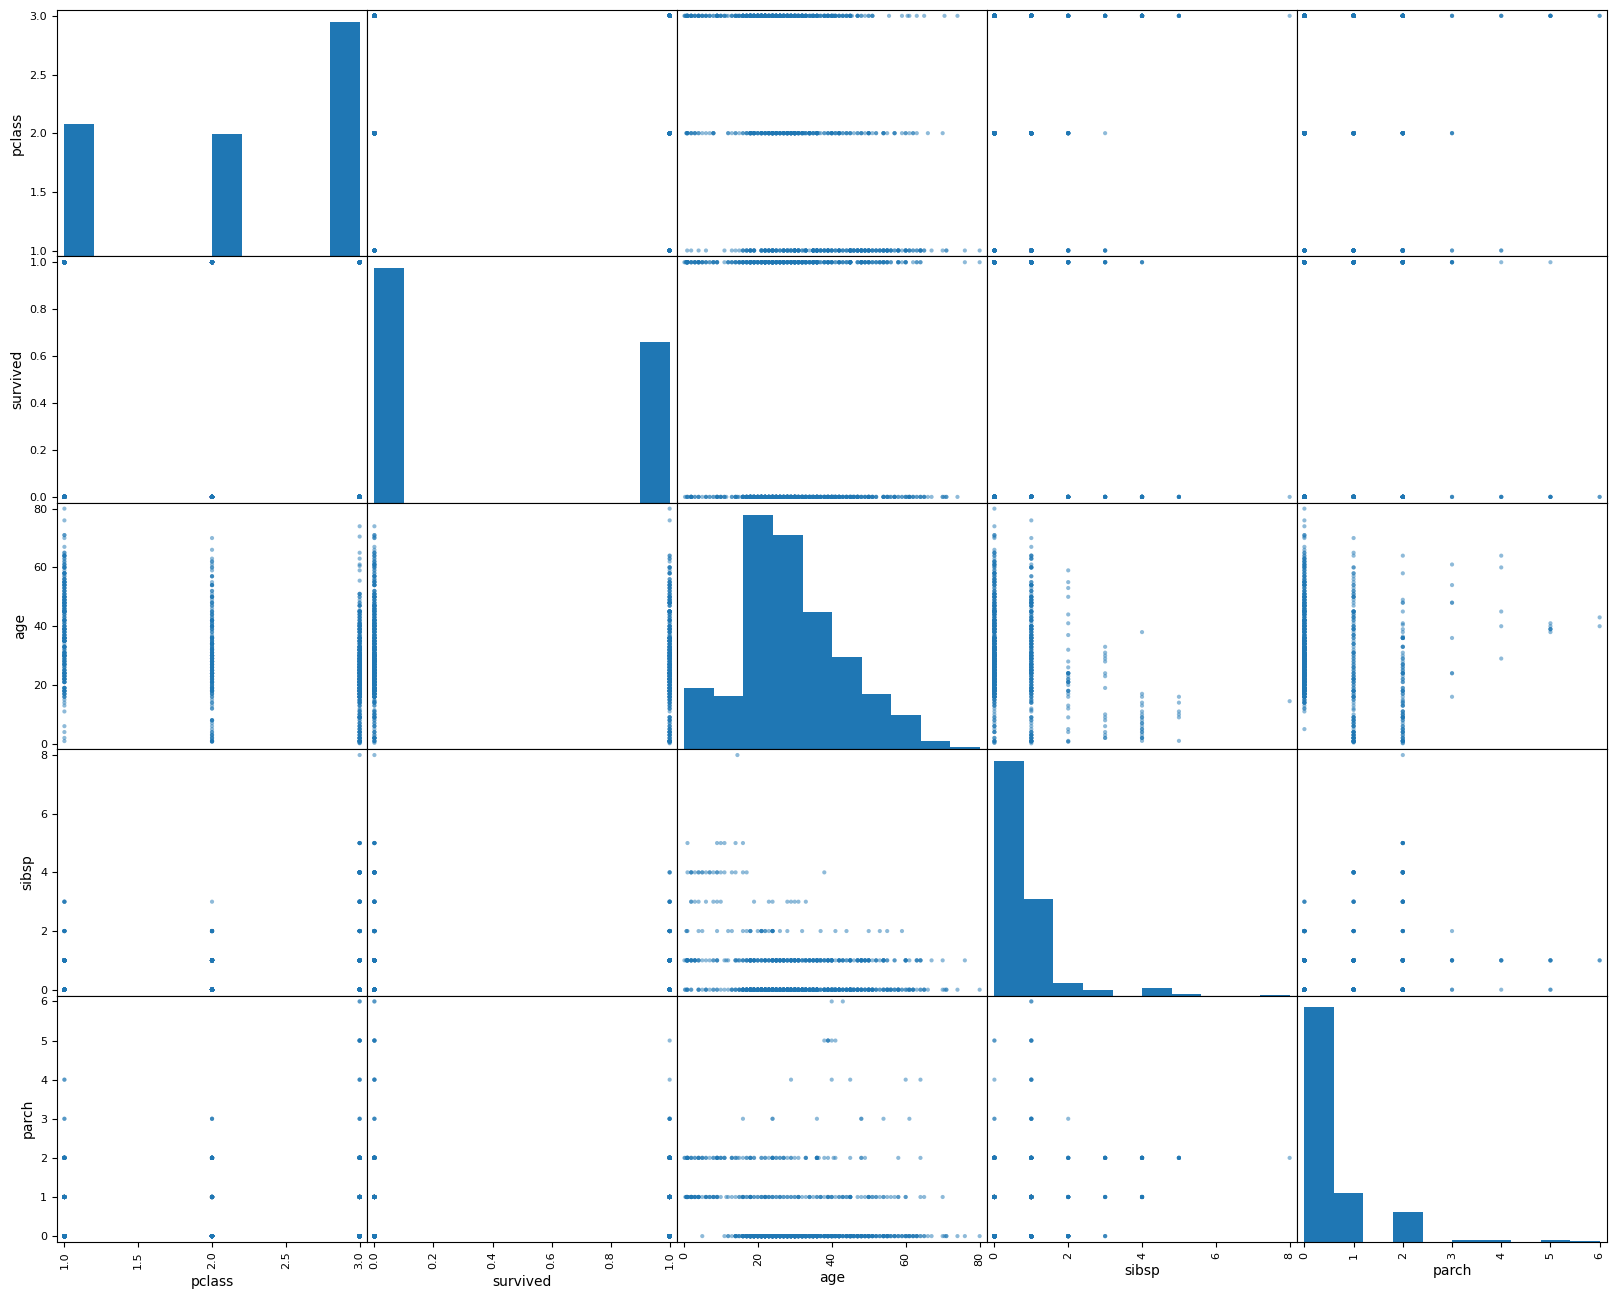

In [ ]:
pd.plotting.scatter_matrix(data_scatter, figsize = (20, 16))
pass

In [ ]:
data_cleaned['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,age
0.005,0.7500
0.010,0.9200
0.050,5.0000
0.100,14.0000
0.500,28.0000
0.900,50.0000
0.950,56.8500
0.990,65.0000
0.995,70.3925


In [ ]:
#X = data.drop(['survived', 'name', 'home.dest', 'sex', 'embarked'], axis=1)
X = data['body']
y = data['survived']
#X, y

In [ ]:
N_test = 800
N_train = X.shape[0] - N_test
N_test, N_train

(800, 509)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = N_train, test_size = N_test,
                                                    stratify = y, random_state = 42)

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=3, p=1)
#knn.fit(X_test, y_test)
#y_pred_knn_test = knn.predict(X_test)
#print("Accuracy test:", accuracy_score(y_test, y_pred_knn_test))
#print(classification_report(y_test, y_pred_knn_test))